<h1>Prediction of Dental Caries Using Machine Learning In Personlized Medecine(ANN)</h1>

<h2>Importing Packages</h2>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


<h2>Fetch Our Data</h2>

In [4]:
df = pd.read_excel('Oral_health_care_dataset.xlsx').copy()
df.head(5)


,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22288 entries, 0 to 22287
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   act_caries_p    22288 non-null  int64
 1   Sido_No         22288 non-null  int64
 2   Region_No       22288 non-null  int64
 3   Gender          22288 non-null  int64
 4   prev_caries_p   22288 non-null  int64
 5   X1              22288 non-null  int64
 6   X2              22288 non-null  int64
 7   X3              22288 non-null  int64
 8   X4_1            22288 non-null  int64
 9   X4_2            22288 non-null  int64
 10  X4_3            22288 non-null  int64
 11  X4_4            22288 non-null  int64
 12  X4_5            22288 non-null  int64
 13  X4_6            22288 non-null  int64
 14  X4_7            22288 non-null  int64
 15  X4_8            22288 non-null  int64
 16  X4_9            22288 non-null  int64
 17  X5_1            22288 non-null  int64
 18  X5_2            22288 non-

In [6]:
df['act_caries_p'].value_counts()

0    20593
1     1695
Name: act_caries_p, dtype: int64

#begin modification

In [5]:
import imblearn
print(imblearn.__version__)

0.6.0


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# transform the dataset

df_new = df
df_new.shape

df_cut_cor=df_new.drop('act_caries_p',axis=1)
df_cut_cor=df_cut_cor.drop('Region_No',axis=1)
df_scaled = df_cut_cor.copy()

Y = df_new['act_caries_p']
X = df_scaled

over = SMOTE(sampling_strategy=0.7)

X, Y = over.fit_resample(X, Y)

In [8]:
from collections import Counter

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20593, 1: 14415})


<h2>Prepare Data for Modeling<h2>

<h2>Scale the dataset</h2>

In [9]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Define the scaler 
#scaler = StandardScaler().fit(X_train)

In [10]:
import numpy as np
#convert the data to numpy arrays
X = np.array(X)

<h2>Buil and compile Fit Model</h2>

In [21]:
from sklearn.model_selection import train_test_split

# build a model
#model = Sequential()
#model.add(Dense(78, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
#model.add(Dropout(0.2))
#model.add(Dense(53, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(38, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(17, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(9, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1, activation='sigmoid'))
#model.summary() 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

model = Sequential()
model.add(Dense(78, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dropout(0.2))
model.add(Dense(53, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary() 
# compile the model

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=30,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, # you can set this to a big number!
                    batch_size=1000,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 78)                3432      
                                                                 
 dropout_15 (Dropout)        (None, 78)                0         
                                                                 
 dense_19 (Dense)            (None, 53)                4187      
                                                                 
 dropout_16 (Dropout)        (None, 53)                0         
                                                                 
 dense_20 (Dense)            (None, 38)                2052      
                                                                 
 dropout_17 (Dropout)        (None, 38)                0         
                                                                 
 dense_21 (Dense)            (None, 17)               

23/23 [==============================] - 0s 7ms/step - loss: 0.3739 - accuracy: 0.8540 - val_loss: 0.3716 - val_accuracy: 0.8527
Epoch 46/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3688 - accuracy: 0.8564 - val_loss: 0.3707 - val_accuracy: 0.8520
Epoch 47/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3677 - accuracy: 0.8553 - val_loss: 0.3698 - val_accuracy: 0.8526
Epoch 48/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3677 - accuracy: 0.8548 - val_loss: 0.3693 - val_accuracy: 0.8533
Epoch 49/200
23/23 [==============================] - 0s 8ms/step - loss: 0.3704 - accuracy: 0.8569 - val_loss: 0.3690 - val_accuracy: 0.8542
Epoch 50/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3740 - accuracy: 0.8532 - val_loss: 0.3676 - val_accuracy: 0.8549
Epoch 51/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3657 - accuracy: 0.8560 - val_loss: 0.3708 - val_accuracy: 0.8522
Epoch 52/200
23/23 

Epoch 103/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3241 - accuracy: 0.8738 - val_loss: 0.3537 - val_accuracy: 0.8634
Epoch 104/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3256 - accuracy: 0.8758 - val_loss: 0.3563 - val_accuracy: 0.8622
Epoch 105/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3251 - accuracy: 0.8752 - val_loss: 0.3548 - val_accuracy: 0.8615
Epoch 106/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3254 - accuracy: 0.8737 - val_loss: 0.3524 - val_accuracy: 0.8665
Epoch 107/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3250 - accuracy: 0.8741 - val_loss: 0.3527 - val_accuracy: 0.8661
Epoch 108/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3269 - accuracy: 0.8728 - val_loss: 0.3535 - val_accuracy: 0.8638
Epoch 109/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3254 - accuracy: 0.8728 - val_loss: 0.3535 - val_accuracy: 0.8638

23/23 [==============================] - 0s 7ms/step - loss: 0.3056 - accuracy: 0.8831 - val_loss: 0.3474 - val_accuracy: 0.8675
Epoch 161/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3079 - accuracy: 0.8814 - val_loss: 0.3470 - val_accuracy: 0.8695
Epoch 162/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.8794 - val_loss: 0.3475 - val_accuracy: 0.8699
Epoch 163/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3080 - accuracy: 0.8851 - val_loss: 0.3496 - val_accuracy: 0.8683
Epoch 164/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3070 - accuracy: 0.8840 - val_loss: 0.3459 - val_accuracy: 0.8704
Epoch 165/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3083 - accuracy: 0.8819 - val_loss: 0.3465 - val_accuracy: 0.8700
Epoch 166/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3062 - accuracy: 0.8826 - val_loss: 0.3465 - val_accuracy: 0.8683
Epoch 167/200

<h2>Evaluate the Model</h2>

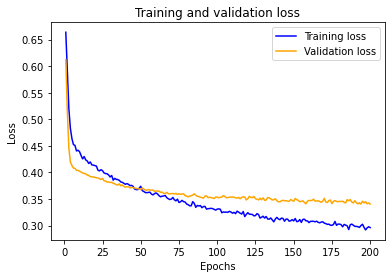

In [22]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

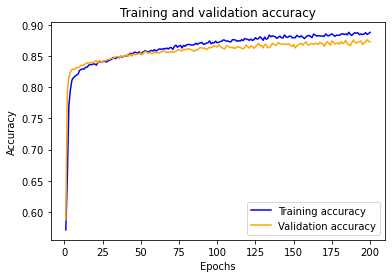

0.8761156797409058

In [23]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'blue', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X_test) # prob of successes (survival)
np.round(model.predict(X_test),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or X_test_fs)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, preds))

[[3706  445]
 [ 415 2436]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4151
           1       0.85      0.85      0.85      2851

    accuracy                           0.88      7002
   macro avg       0.87      0.87      0.87      7002
weighted avg       0.88      0.88      0.88      7002

